In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

2024-03-08 12:48:48.060770: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 12:48:48.103069: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 12:48:48.103101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 12:48:48.104114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 12:48:48.109987: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 12:48:48.110722: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
label_id_to_clothe_name = {
	0: "tshirt",
	1: "trouser",
	2: "pullover",
	3: "dress",
	4: "coat",
	5: "sandal",
	6: "shit",
	7: "sneaker",
	8: "bag",
	9: "ankleboot"
}

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [3]:
train_data[0].shape

(28, 28)

5 sandal


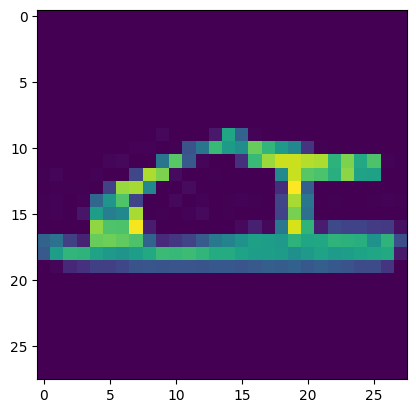

In [4]:
import matplotlib.pyplot as plt

test_id = 120
test_label_id = train_labels[test_id]

print(test_label_id, label_id_to_clothe_name[test_label_id])
plt.imshow(train_data[test_id])

In [5]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28, 28)),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(10, activation="softmax") # multiclass problem
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(),
				metrics=["accuracy"])

model_fit_hist = model_1.fit(train_data,
							train_labels,
							epochs=10,
							validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3836 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2828 - accuracy: 0.1084 - val_loss: 2.1157 - val_accuracy: 0.1735
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8871 - accuracy: 0.2189 - val_loss: 1.7384 - val_accuracy:

In [6]:
train_data_normalized = train_data / 255.0
test_data_normalized = test_data / 255.0

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28, 28)),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(10, activation="softmax") # multiclass problem
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(),
				metrics=["accuracy"])

model_fit_hist_normalized = model_2.fit(train_data_normalized,
							train_labels,
							epochs=10,
							validation_data=(test_data_normalized, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2654 - accuracy: 0.5633 - val_loss: 0.8779 - val_accuracy: 0.7081
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8231 - accuracy: 0.7147 - val_loss: 0.8096 - val_accuracy: 0.7129
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7654 - accuracy: 0.7267 - val_loss: 0.7649 - val_accuracy: 0.7285
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7296 - accuracy: 0.7375 - val_loss: 0.7276 - val_accuracy: 0.7353
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6978 - accuracy: 0.7483 - val_loss: 0.7166 - val_accuracy: 0.7441
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6663 - accuracy: 0.7608 - val_loss: 0.6766 - val_accuracy: 0.7651
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6480 - accuracy: 0.7690 - val_loss: 0.6514 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

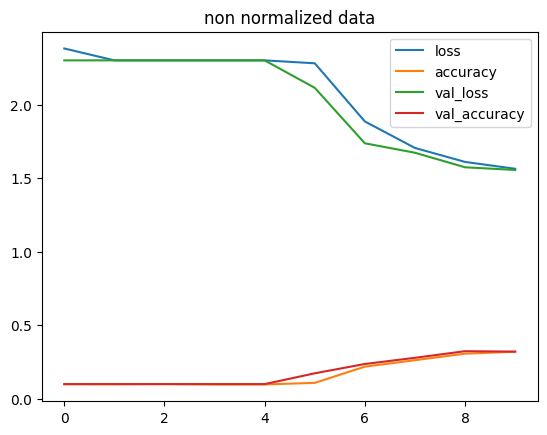

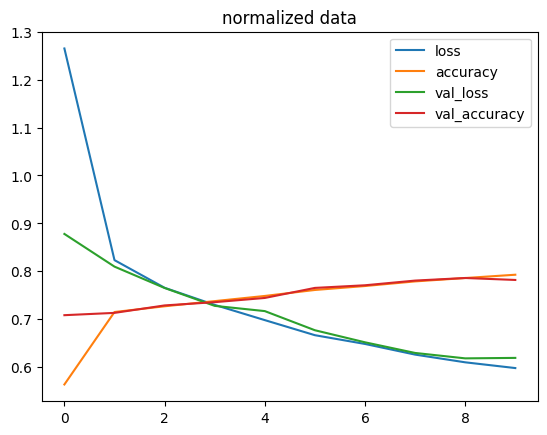

In [8]:
import pandas as pd

pd.DataFrame(model_fit_hist.history).plot(title="non normalized data")
pd.DataFrame(model_fit_hist_normalized.history).plot(title="normalized data")

In [10]:
# ideal learning rate

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28, 28)),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(10, activation="softmax") # multiclass problem
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(),
				metrics=["accuracy"])

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_fit_hist_3 = model_3.fit(train_data_normalized,
							train_labels,
							epochs=40,
							validation_data=(test_data_normalized, test_labels),
							callbacks=[learning_rate_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4739 - accuracy: 0.3893 - val_loss: 1.1240 - val_accuracy: 0.5476 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9069 - accuracy: 0.6492 - val_loss: 0.8109 - val_accuracy: 0.7058 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7016 - accuracy: 0.7588 - val_loss: 0.6907 - val_accuracy: 0.7652 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6486 - accuracy: 0.7737 - val_loss: 0.6574 - val_accuracy: 0.7756 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6231 - accuracy: 0.7807 - val_loss: 0.6511 - val_accuracy: 0.7734 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6081 - accuracy: 0.7852 - val_loss: 0.6689 - val_accuracy: 0.7721 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'finding ideal learning rate')

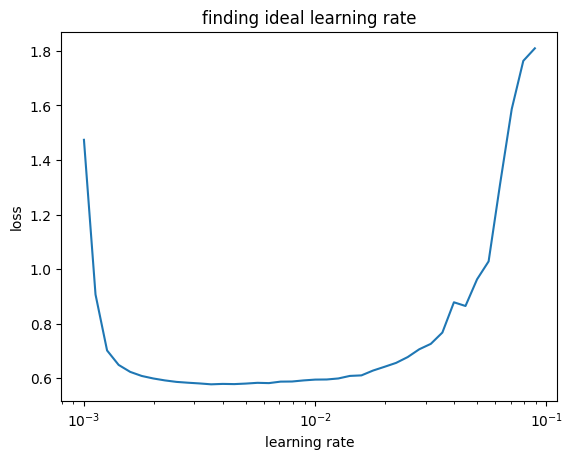

In [11]:
import numpy as np
import matplotlib.pyplot as plt

learning_rates = 1e-3 * (10**(tf.range(40) / 20))
plt.semilogx(learning_rates, model_fit_hist_3.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("finding ideal learning rate")

In [12]:
# adjusted learning rate

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28, 28)),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(4, activation="relu"),
	tf.keras.layers.Dense(10, activation="softmax") # multiclass problem
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
				optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015),
				metrics=["accuracy"])

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_fit_hist_4 = model_4.fit(train_data_normalized,
							train_labels,
							epochs=40,
							validation_data=(test_data_normalized, test_labels),
							callbacks=[learning_rate_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3622 - accuracy: 0.4667 - val_loss: 1.0880 - val_accuracy: 0.5751 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9935 - accuracy: 0.5957 - val_loss: 0.9331 - val_accuracy: 0.6079 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8739 - accuracy: 0.6344 - val_loss: 0.8561 - val_accuracy: 0.6664 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8219 - accuracy: 0.6576 - val_loss: 0.8182 - val_accuracy: 0.6614 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7935 - accuracy: 0.6737 - val_loss: 0.7757 - val_accuracy: 0.7118 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6879 - accuracy: 0.7412 - val_loss: 0.7038 - val_accuracy: 0.7466 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

In [13]:
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

predicted_labels = model_4.predict(test_data_normalized)

cm = confusion_matrix(test_labels, tf.round(predicted_labels))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmpa=plt.cm.Blues)
fig.colorbar(cax)

labels = np.arange(cm.shape[0])

ax.set(title="confusion matrix",xlabel="predicted label", ylabel="true label",
	   xticks=np.arange(n_classes),
	   xticks=np.arange(n_classes),
	   xticklabels=labels,
	   yticklabels=labels
	   )

313/313 [==============================] - 1s 1ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [16]:
weigths, biases = model_1.layers[1].get_weights()

weigths, biases

(array([[-0.03851521, -0.05873049, -0.02313616,  0.08318895],
        [ 0.08044387,  0.01500221, -0.08177393, -0.02167886],
        [ 0.01395528,  0.06210461,  0.05789012, -0.10015095],
        ...,
        [-0.05654929,  0.01266226,  0.01717441, -0.12534718],
        [-0.00025248, -0.07569168, -0.07548307,  0.23775262],
        [ 0.07857724, -0.0221656 ,  0.02839432, -0.08642805]],
       dtype=float32),
 array([-0.01309749, -0.02592898, -0.0206523 ,  0.9770248 ], dtype=float32))